## Imports

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Reading Dataset

In [5]:
data = pd.read_excel("final_df.xlsx")
data.rename(columns={'diğer\nürün / uygulama / cihaz': 'diğer'}, inplace=True)
data = data.iloc[:,1:]

### Analyzing the Data

In [7]:
data.head()

,tweet,entity list,target,severity,reason,muhattap,mobil,sabit,ek paket,kampanya,diğer,reklam,çağrı merkezi,bayi,aksiyon,label
0,Ulan Wifi'ye bağlıyım ben. Ona bağlıyken Turkc...,turkcell,olumsuz,1,fatura,1,1,0,0,0,0,0,0,0,1,1
1,20 dk 1 GB internet 500 mb sadece kaşar turkce...,turkcell,olumsuz,1,network,1,1,0,0,0,0,0,0,0,1,1
2,Ayrıca turkcell superonline reklamı kadar da k...,"turkcell,;superonline",olumsuz,0,reklam,1,0,1,0,0,0,1,0,0,0,2
3,Turkcell çok pahalı ya,turkcell,olumsuz,0,fatura,1,1,0,0,0,0,0,0,0,0,1
4,Turkcell Kaş'ta internetin cekmiyor,turkcell; kaş,olumsuz,2,network,1,1,0,0,0,0,0,0,0,1,1


In [8]:
data.tail()

,tweet,entity list,target,severity,reason,muhattap,mobil,sabit,ek paket,kampanya,diğer,reklam,çağrı merkezi,bayi,aksiyon,label
20702,Başka bir operatörden ne yazık ki Turkcell'e g...,turkcell,olumsuz,2,diğer,1,1,0,0,0,0,0,0,0,1,1
20703,Uygulamaya asla giriş yapamıyorum. Hata veriyo...,turkcell,olumsuz,1,uygulama,1,1,0,0,0,0,0,0,0,1,1
20704,"Turkcell uygulaması açılmıyor, ekranda sadece ...",turkcell; turkcell uygulaması,olumsuz,1,ek paket,1,1,0,1,0,1,0,0,0,1,6
20705,Paycell kredi kartımdan bilgim dışında para çe...,paycell; turkcell; tyg,olumsuz,1,ürün,1,1,0,1,0,0,0,0,0,1,6
20706,"""Dijital operatör hesabım sürekli hata veriyor...",dijital operatör,olumsuz,1,diğer,1,1,0,1,0,1,1,0,0,1,6


In [9]:
# Step 1: Split the values in the 'entity list' column by ';'
split_entities = data.loc[15000:,'entity list'].str.split(';')

# Step 2: Flatten the list of lists and extract unique words
flattened_entities = [item for sublist in split_entities for item in sublist]

# Step 3: Get unique words
unique_entities = set(flattened_entities)

# Print unique entities
print(unique_entities)


{'', ' turkcell.', ' kumluca', ' menemen', ' gölcük', ' turkcell bayi', 'gnc', 'fiber internet', 'dijital operatör', 'digital kurye', 'müşteri temsilcisi', 'digiturk', ' platinum paket', ' hazır karta', 'faturalı hat', 'platinum', 'getir', ' müşteri hizmeti', 'upcall', ' superonline müşteri hizmetleri', ' mutlu çocuklar', 'reklam', ' apple store', ' müşteri temsilcisi', 'premium üyelik', ' turkcell tv', ' turkcell pasaj müşteri hizmetleri', ' tyg avantaj paketi', ' bi̇p uygulaması', 'olur', 'super box', 'rahat hat', 'çağrı merkezi', ' kepsut', 'lifebox', ' superonline', ' turkcell asistan uygulaması', ' superonline müşteri temsilcileri', 'apple', ' turkcell pasaj', ' araç', ' turkcell uygulaması', ' i̇psala', ' türk telekom', ' turkcell müşteri temsilcisi', ' olur', ' çekmeköy', ' papara', 'tv plus', ' upcall', ' vodafone', ' rahat tarifesi', ' turkcell hat', ' sur', ' pasaj', ' ', ' sancaktepe', 'müşteri hizmeti', 'exxen', ' tvplus', ' turkcell şube', ' turkcell i̇letişim merkezleri',

In [10]:
data['reason'].unique()

array(['fatura', 'network', 'reklam', nan, 'diğer', 'mnp',
       'çağrı merkezi yetkinlik', 'kampanya', 'bayi', 'paket', 'uygulama',
       'ürün', 'ek paket', 'cihaz', 'boykot', 'KVKK', 'kurumsal'],
      dtype=object)

In [11]:
fatura_list = []
network_list = ['superbox','superonline']
reklam_list = []
nan_list = []
mnp_list = []
cagrı_list = ['turkcell müşteri temsilcisi', 'dijital asistan', 'müşteri hizmetleri', ]
kampanya_list = []
bayi_list = []
paket_list = ['tyg', 'gnç', 'platinium', 'rahat hat','yurt dışı', ]
uygulama_list = ['turkcell uygulaması', 'pasaj', 'tv plus', 'fizy', 'turkcell tv','upcall', ]
ürün_list = ['paycell','lifebox', 'hazır kart', ]
ek_list = []
cihaz_list = []
boykot_list = []
KVKK_list = []
kurumsal_list = []
# Combine all lists into a dictionary for easier lookup
entity_dict = {
    'fatura': fatura_list,
    'network': network_list,
    'reklam': reklam_list,
    'nan': nan_list,
    'mnp': mnp_list,
    'çağrı merkezi yetkinlik': cagrı_list,
    'kampanya': kampanya_list,
    'bayi': bayi_list,
    'paket': paket_list,
    'uygulama': uygulama_list,
    'ürün': ürün_list,
    'ek': ek_list,
    'cihaz': cihaz_list,
    'boykot': boykot_list,
    'KVKK': KVKK_list,
    'kurumsal': kurumsal_list
}

# Function to update the reason if it is 'diğer' and the entity is in the list
def update_reason(row, entity_dict):
    if row['reason'] == 'diğer':
        entities = row['entity list'].split(';')
        for entity in entities:
            for key, entity_list in entity_dict.items():
                if entity in entity_list:
                    return key
    return row['reason']

# Apply the function to the DataFrame
data['reason'] = data.apply(lambda row: update_reason(row, entity_dict), axis=1)

# Display the updated DataFrame
print(data)
#data.to_excel("final_df.xlsx")
#data = pd.read_excel('final_df.xlsx')

                                                   tweet  \
0      Ulan Wifi'ye bağlıyım ben. Ona bağlıyken Turkc...   
1      20 dk 1 GB internet 500 mb sadece kaşar turkce...   
2      Ayrıca turkcell superonline reklamı kadar da k...   
3                                 Turkcell çok pahalı ya   
4                    Turkcell Kaş'ta internetin cekmiyor   
...                                                  ...   
20702  Başka bir operatörden ne yazık ki Turkcell'e g...   
20703  Uygulamaya asla giriş yapamıyorum. Hata veriyo...   
20704  Turkcell uygulaması açılmıyor, ekranda sadece ...   
20705  Paycell kredi kartımdan bilgim dışında para çe...   
20706  "Dijital operatör hesabım sürekli hata veriyor...   

                         entity list   target  severity    reason  muhattap  \
0                           turkcell  olumsuz         1    fatura         1   
1                           turkcell  olumsuz         1   network         1   
2              turkcell,;superonline  olum

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20707 entries, 0 to 20706
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet          20707 non-null  object
 1   entity list    20707 non-null  object
 2   target         20707 non-null  object
 3   severity       20707 non-null  int64 
 4   reason         13276 non-null  object
 5   muhattap       20707 non-null  int64 
 6   mobil          20707 non-null  int64 
 7   sabit          20707 non-null  int64 
 8   ek paket       20707 non-null  int64 
 9   kampanya       20707 non-null  int64 
 10  diğer          20707 non-null  int64 
 11  reklam         20707 non-null  int64 
 12  çağrı merkezi  20707 non-null  int64 
 13  bayi           20707 non-null  int64 
 14  aksiyon        20707 non-null  int64 
 15  label          20707 non-null  int64 
dtypes: int64(12), object(4)
memory usage: 2.5+ MB


### Checking For Duplication

In [14]:
data.nunique()

tweet            20695
entity list       2495
target               3
severity             3
reason              16
muhattap             2
mobil                2
sabit                2
ek paket             2
kampanya             2
diğer                2
reklam               2
çağrı merkezi        2
bayi                 2
aksiyon              2
label               16
dtype: int64

### Missing Values Calculation

#### Ratio null

In [17]:
total_counts = data.shape[0]

In [18]:
null_counts = data.isnull().sum()

In [19]:
null_ratios = null_counts / total_counts

#### Ratio of "not null"

In [21]:
not_null_counts = data.notnull().sum()

In [22]:
not_null_ratios = not_null_counts / total_counts

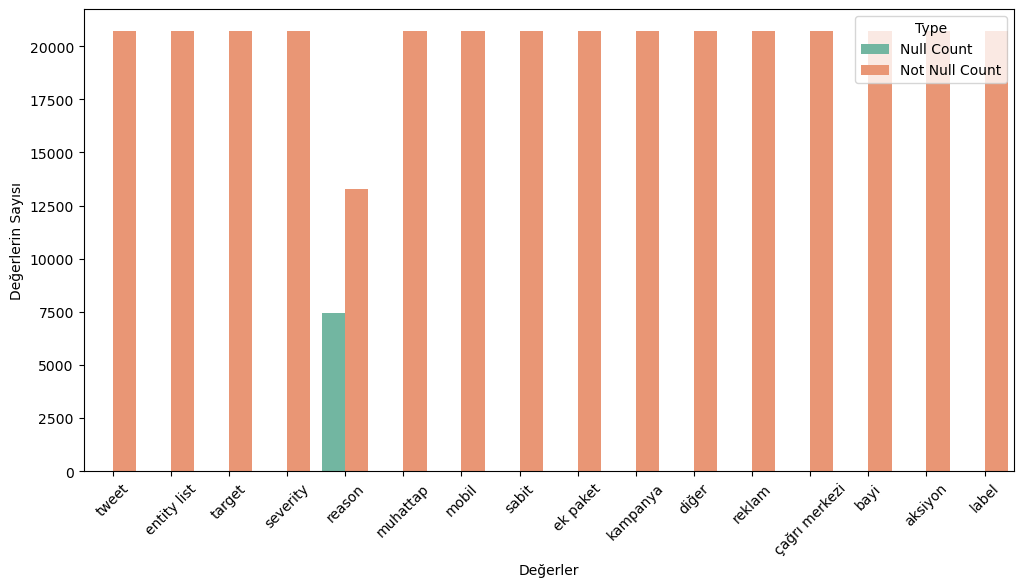

In [157]:
summary_df = pd.DataFrame({
    'Column': data.columns,
    'Null Count': null_counts.values,
    'Not Null Count': not_null_counts.values,
    'Null Ratio': null_ratios.values,
    'Not Null Ratio': not_null_ratios.values
})
counts_df = summary_df.melt(id_vars='Column', value_vars=['Null Count', 'Not Null Count'], 
                            var_name='Type', value_name='Count')

# Visualize counts
plt.figure(figsize=(12, 6))
sns.barplot(x='Column', y='Count', hue='Type', data=counts_df, palette='Set2')
plt.xlabel('Değerler')
plt.ylabel('Değerlerin Sayısı')
plt.xticks(rotation=45)
plt.savefig('graph1.png')
plt.show()

### Ratio of 'olumlu'

In [25]:
ratio_olumlu = data[data['target'] == 'olumlu'].target.size / data.target.size

### Ratio of 'nötr'

In [27]:
ratio_notr = data[data['target'] == 'nötr'].target.size / data.target.size

### Ratio of 'olumsuz'

In [29]:
ratio_olumsuz = data[data['target'] == 'olumsuz'].target.size / data.target.size

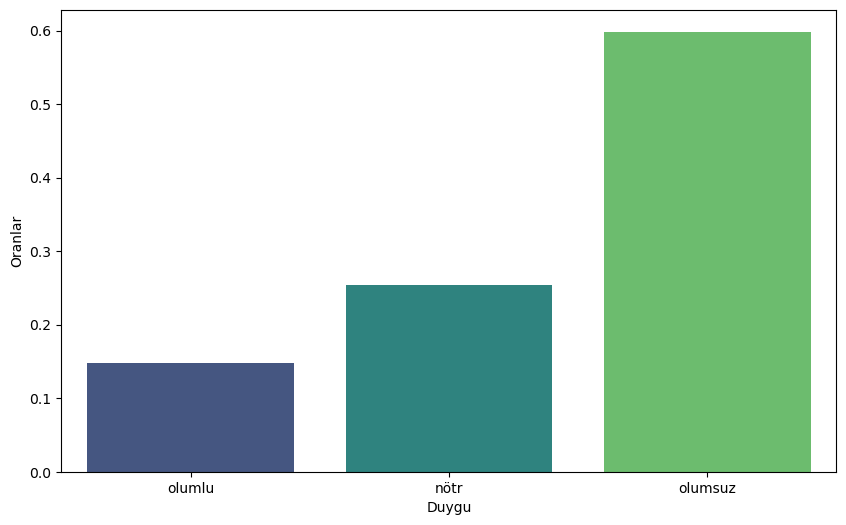

In [161]:
target_list = ['olumlu', 'nötr', 'olumsuz']
target_ratio_list = [ratio_olumlu, ratio_notr, ratio_olumsuz]
plt.figure(figsize=(10, 6))
sns.barplot(x=target_list, y=target_ratio_list, palette='viridis')
plt.xlabel('Duygu')
plt.ylabel('Oranlar')
plt.savefig('graph2.png')
plt.show()

### Count of Unique Reasons

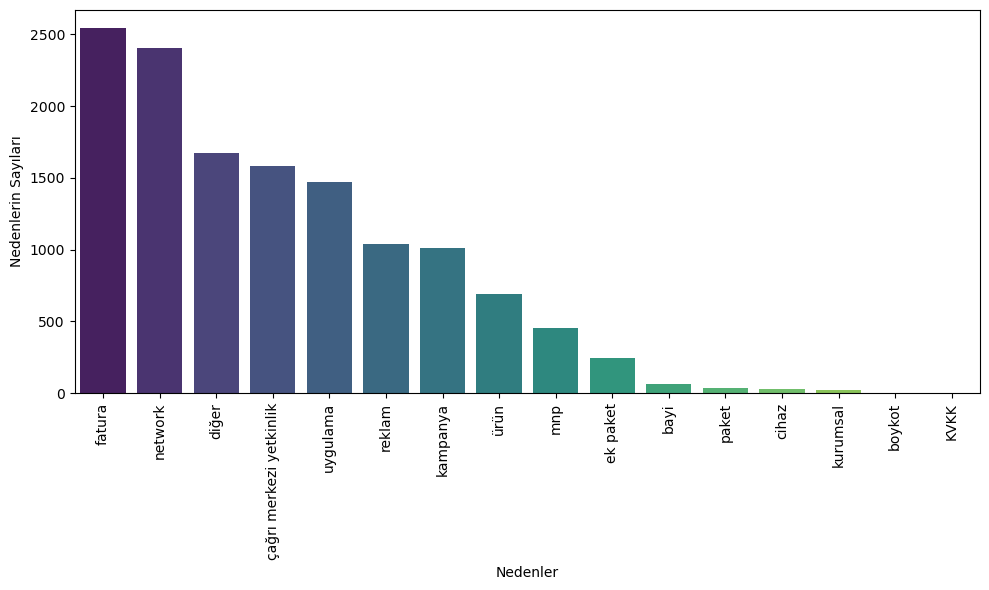

In [180]:
# Example DataFrame
value_counts = data['reason'].value_counts().reset_index()
value_counts.columns = ['Reason', 'Count']

# Visualize the counts of unique values
plt.figure(figsize=(10, 6))
sns.barplot(x='Reason', y='Count', data=value_counts, palette='viridis')
plt.xlabel('Nedenler')
plt.ylabel('Nedenlerin Sayıları')
plt.xticks(rotation=90)  # Rotate x-axis labels vertically for better readability
plt.tight_layout()  # Adjust layout to ensure everything fits without clipping

# Save the plot
plt.savefig('graph3.png', bbox_inches='tight', pad_inches=0.1)
plt.show()


## Feature Engineering

In [34]:
def classify(row):
    if row['mobil'] == 1 and row['sabit'] == 0 and row['ek paket'] == 0 and row['kampanya'] == 0:
        return 1
    elif row['mobil'] == 0 and row['sabit'] == 1 and row['ek paket'] == 0 and row['kampanya'] == 0:
        return 2
    elif row['mobil'] == 0 and row['sabit'] == 0 and row['ek paket'] == 1 and row['kampanya'] == 0:
        return 3
    elif row['mobil'] == 0 and row['sabit'] == 0 and row['ek paket'] == 0 and row['kampanya'] == 1:
        return 4
    elif row['mobil'] == 1 and row['sabit'] == 1 and row['ek paket'] == 0 and row['kampanya'] == 0:
        return 5
    elif row['mobil'] == 1 and row['sabit'] == 0 and row['ek paket'] == 1 and row['kampanya'] == 0:
        return 6
    elif row['mobil'] == 1 and row['sabit'] == 0 and row['ek paket'] == 0 and row['kampanya'] == 1:
        return 7
    elif row['mobil'] == 0 and row['sabit'] == 1 and row['ek paket'] == 1 and row['kampanya'] == 0:
        return 8
    elif row['mobil'] == 0 and row['sabit'] == 1 and row['ek paket'] == 0 and row['kampanya'] == 1:
        return 9
    elif row['mobil'] == 0 and row['sabit'] == 0 and row['ek paket'] == 1 and row['kampanya'] == 1:
        return 10
    elif row['mobil'] == 1 and row['sabit'] == 1 and row['ek paket'] == 1 and row['kampanya'] == 0:
        return 11
    elif row['mobil'] == 1 and row['sabit'] == 1 and row['ek paket'] == 0 and row['kampanya'] == 1:
        return 12
    elif row['mobil'] == 1 and row['sabit'] == 0 and row['ek paket'] == 1 and row['kampanya'] == 1:
        return 13
    elif row['mobil'] == 0 and row['sabit'] == 1 and row['ek paket'] == 1 and row['kampanya'] == 1:
        return 14
    elif row['mobil'] == 1 and row['sabit'] == 1 and row['ek paket'] == 1 and row['kampanya'] == 1:
        return 15

data['label'] = data.apply(classify, axis=1)

# NaN değerleri 0 ile doldur
data['label'] = data['label'].fillna(0).astype(int)

### Label Count with Zero

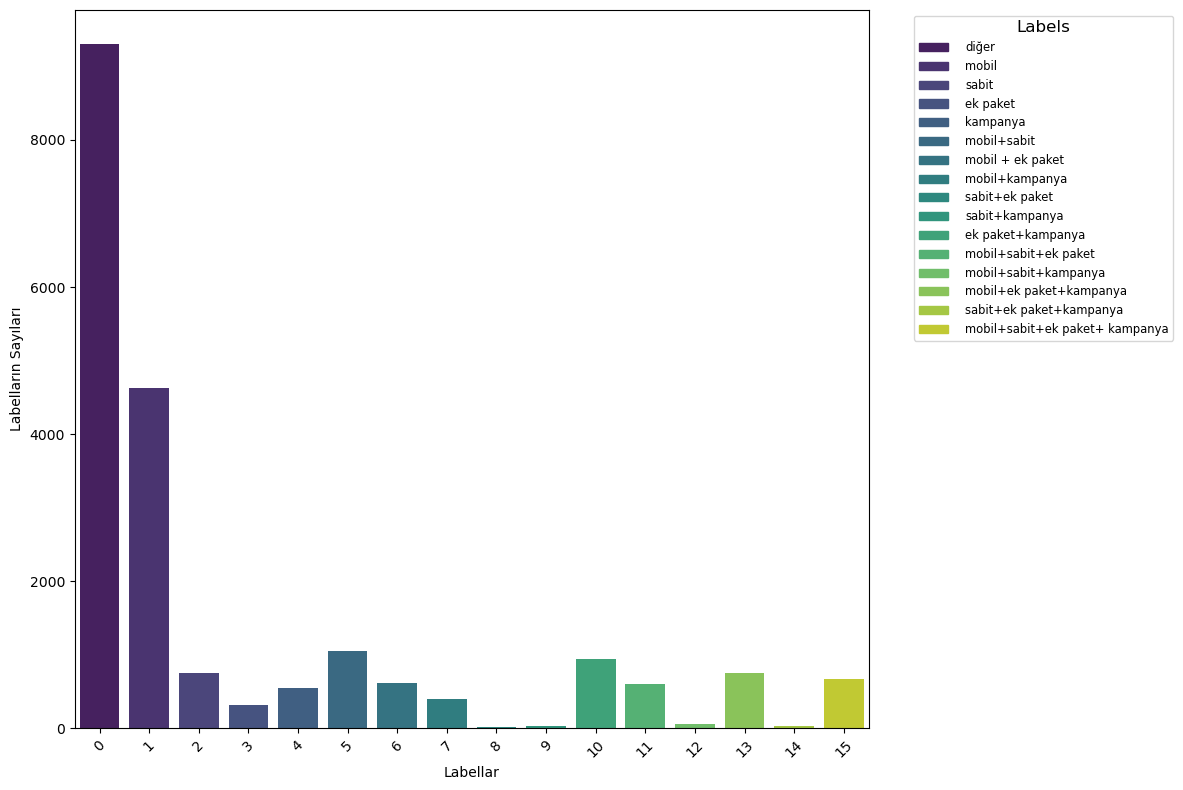

In [218]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each label
label_counts = data['label'].value_counts().reset_index()
label_counts.columns = ['Label', 'Count']

# Visualize the counts
plt.figure(figsize=(12, 8))  # Increase figure size to accommodate the legend
barplot = sns.barplot(x='Label', y='Count', data=label_counts, palette='viridis')
plt.xlabel('Labellar')
plt.ylabel('Labelların Sayıları')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Manually create a legend with increased size
labels = ['diğer', 'mobil', 'sabit', 'ek paket', 'kampanya', 'mobil+sabit', 'mobil + ek paket', 
          'mobil+kampanya', 'sabit+ek paket', 'sabit+kampanya', 'ek paket+kampanya', 
          'mobil+sabit+ek paket', 'mobil+sabit+kampanya', 'mobil+ek paket+kampanya', 
          'sabit+ek paket+kampanya', 'mobil+sabit+ek paket+ kampanya']
handles = [plt.Rectangle((0, 0), 1, 1, color=barplot.patches[i].get_facecolor()) for i in range(len(labels))]

# Increase legend font size and handle size
plt.legend(handles, labels, title='Labels', bbox_to_anchor=(1.05, 1), loc='upper left', 
           fontsize='small', title_fontsize='large', handlelength=2.5, handletextpad=1.5)

# Save the plot with adjusted layout
plt.tight_layout()  # Adjust layout to make room for the legend
plt.savefig('graph4.png', bbox_inches='tight', pad_inches=0.1)
plt.show()




### Label Count without Zero

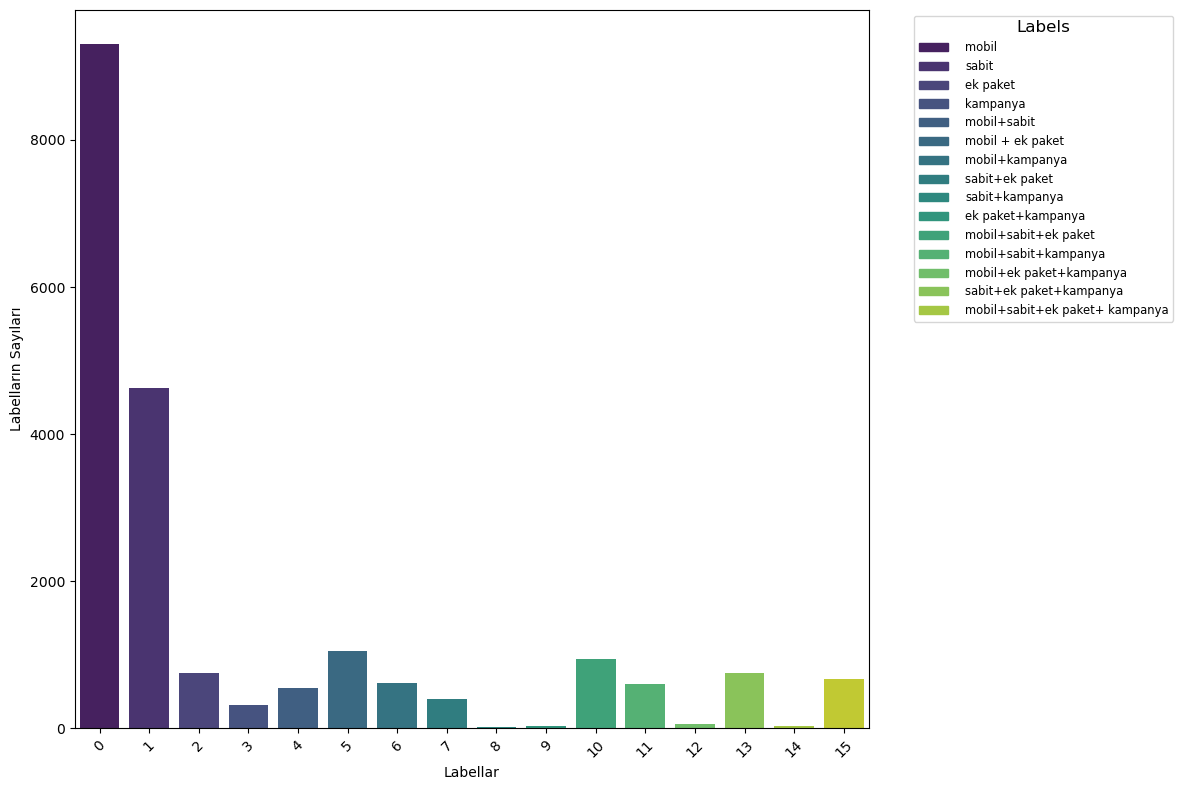

In [236]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each label
label_counts = data['label'].value_counts().reset_index()
label_counts.columns = ['Label', 'Count']

# Exclude 'diğer' from the counts
label_counts = label_counts[label_counts['Label'] != 'diğer']

# Visualize the counts
plt.figure(figsize=(12, 8))  # Increase figure size to accommodate the legend
barplot = sns.barplot(x='Label', y='Count', data=label_counts, palette='viridis')
plt.xlabel('Labellar')
plt.ylabel('Labelların Sayıları')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Manually create a legend with increased size
labels = ['mobil', 'sabit', 'ek paket', 'kampanya', 'mobil+sabit', 'mobil + ek paket', 
          'mobil+kampanya', 'sabit+ek paket', 'sabit+kampanya', 'ek paket+kampanya', 
          'mobil+sabit+ek paket', 'mobil+sabit+kampanya', 'mobil+ek paket+kampanya', 
          'sabit+ek paket+kampanya', 'mobil+sabit+ek paket+ kampanya']

# Update handles to match the filtered data
handles = [plt.Rectangle((0, 0), 1, 1, color=barplot.patches[i].get_facecolor()) for i in range(len(labels))]

# Increase legend font size and handle size
plt.legend(handles, labels, title='Labels', bbox_to_anchor=(1.05, 1), loc='upper left', 
           fontsize='small', title_fontsize='large', handlelength=2.5, handletextpad=1.5)

# Save the plot with adjusted layout
plt.tight_layout()  # Adjust layout to make room for the legend
plt.savefig('graph5.png', bbox_inches='tight', pad_inches=0.1)

# Show the plot
plt.show()



## Severitynin Reasona Kırınımları

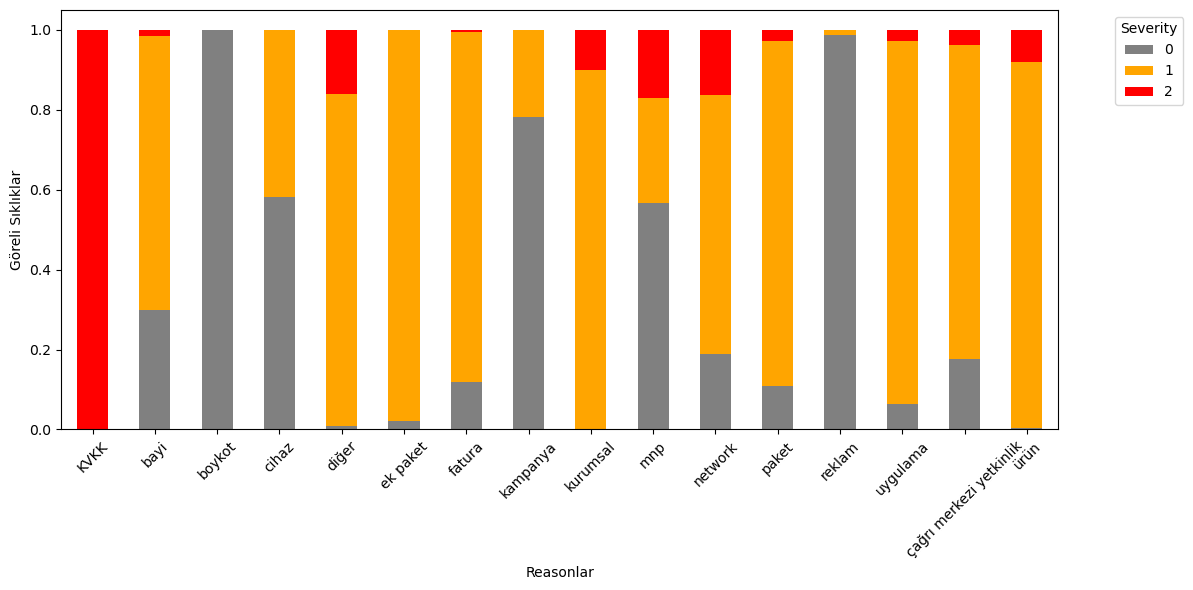

In [159]:
severity_counts = data.groupby('reason')['severity'].value_counts(normalize=True).unstack().fillna(0)

# Define custom colors in reverse order
custom_colors = ['gray', 'orange', 'red']

# Bar plot
ax = severity_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=custom_colors)
plt.xlabel('Reasonlar')
plt.ylabel('Göreli Sıklıklar')
plt.xticks(rotation=45)
plt.legend(title='Severity', labels=['0', '1', '2'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to make room for the legend
plt.savefig('graph6.png')
plt.show()

## Severitynin Labela Kırınımı

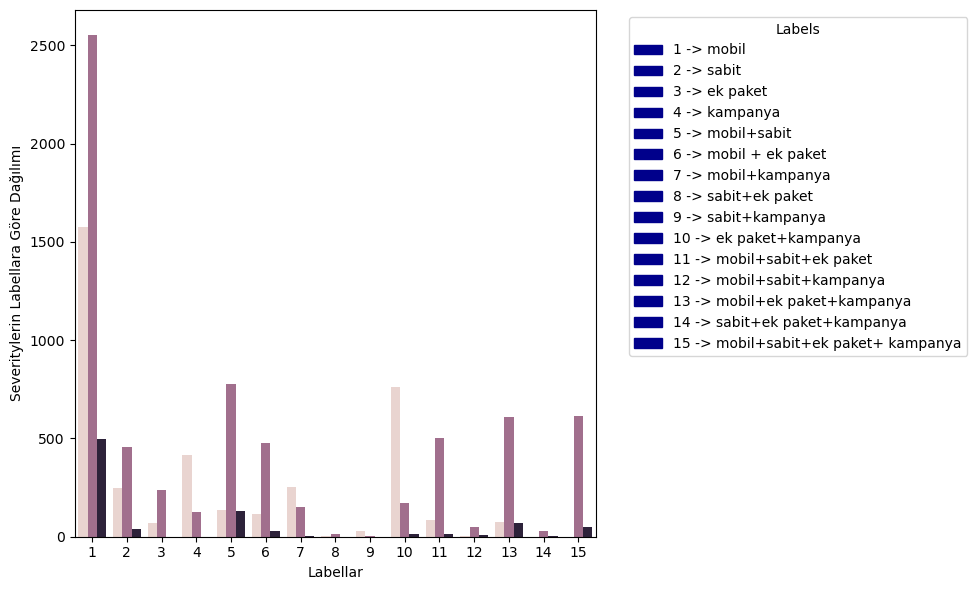

In [167]:

# Seaborn ile veri görselleştirme
plt.figure(figsize=(10, 6))
filtered_data=data[data['label'] != 0]
barplot = sns.countplot(data=filtered_data, x='label', hue='severity')
legend_color = 'darkblue'
# Lejant etiketlerini ve renklerini özelleştirme
labels = ['1 -> mobil', '2 -> sabit', '3 -> ek paket', '4 -> kampanya', '5 -> mobil+sabit', '6 -> mobil + ek paket', '7 -> mobil+kampanya', '8 -> sabit+ek paket',
          '9 -> sabit+kampanya', '10 -> ek paket+kampanya', '11 -> mobil+sabit+ek paket', '12 -> mobil+sabit+kampanya', '13 -> mobil+ek paket+kampanya', 
          '14 -> sabit+ek paket+kampanya', '15 -> mobil+sabit+ek paket+ kampanya']
          
handles = [plt.Rectangle((0, 0), 1, 1, color=legend_color) for i in range(0, len(labels))]

# Manually create a legend
legend = plt.legend(handles, labels, title='Labels', bbox_to_anchor=(1.05, 1), loc='upper left')

# Grafiği düzenleme
plt.title("'label' sütununa Göre 'severity' Dağılımı")
plt.xlabel('Labellar')
plt.ylabel('Severitylerin Labellara Göre Dağılımı')
plt.tight_layout()
plt.savefig('graph7.png', bbox_inches='tight', pad_inches=0.1, bbox_extra_artists=[legend])
plt.show()

## Akiyon 1 olup Diğer Sütunlara ve Target a Dağılımı

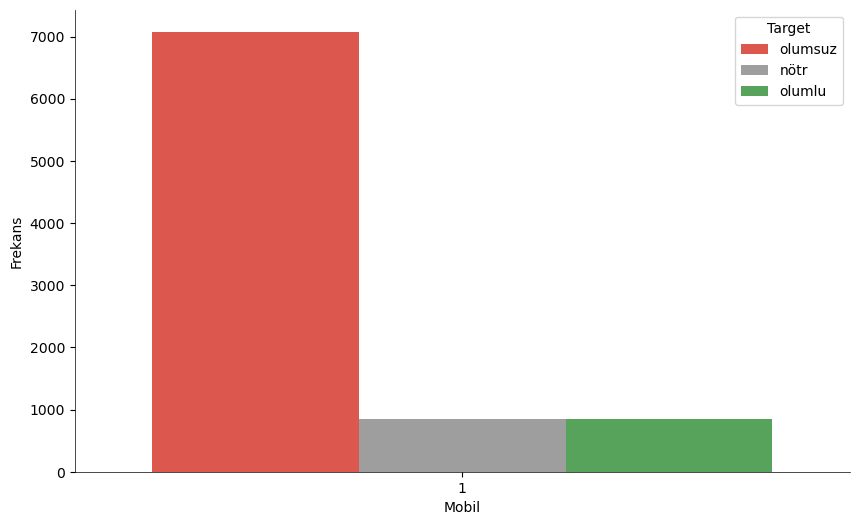

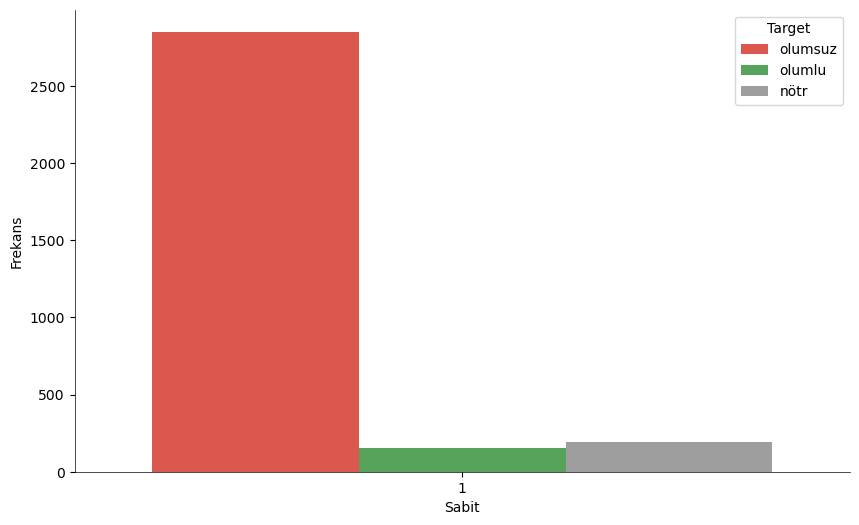

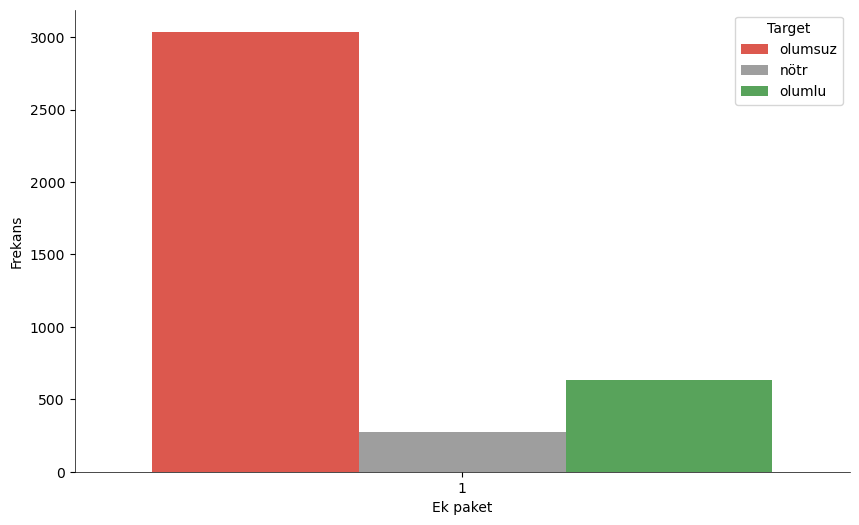

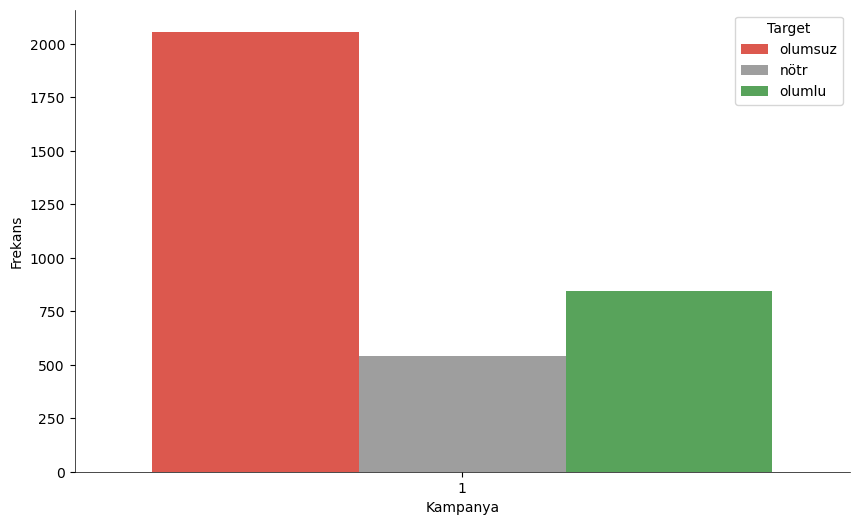

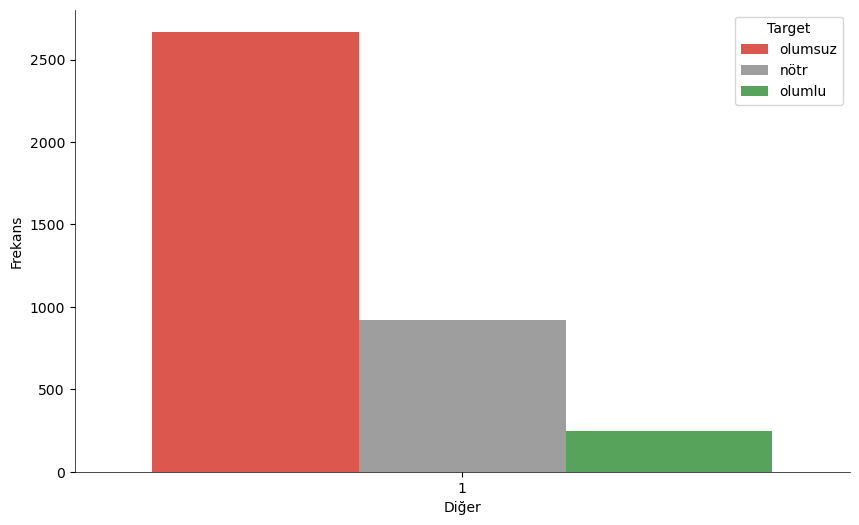

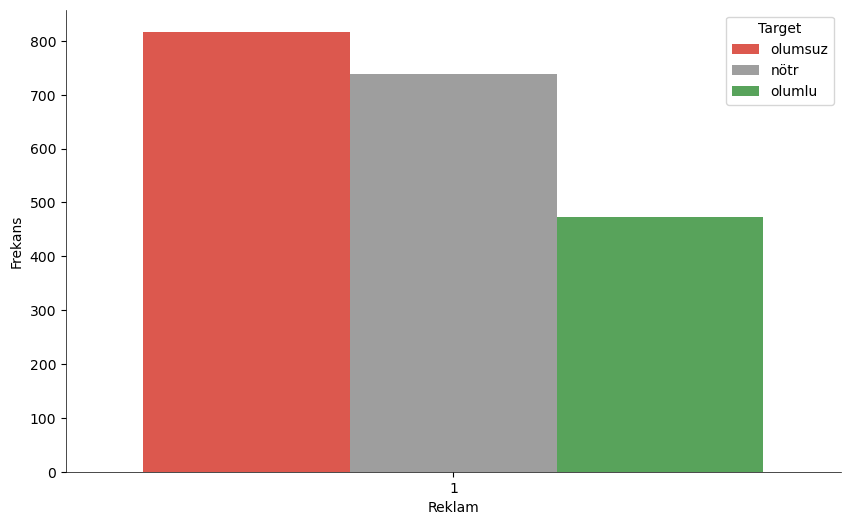

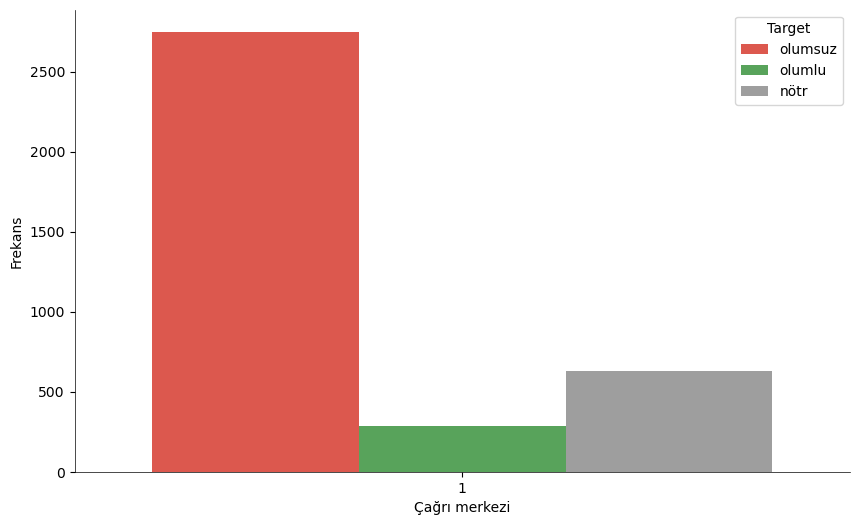

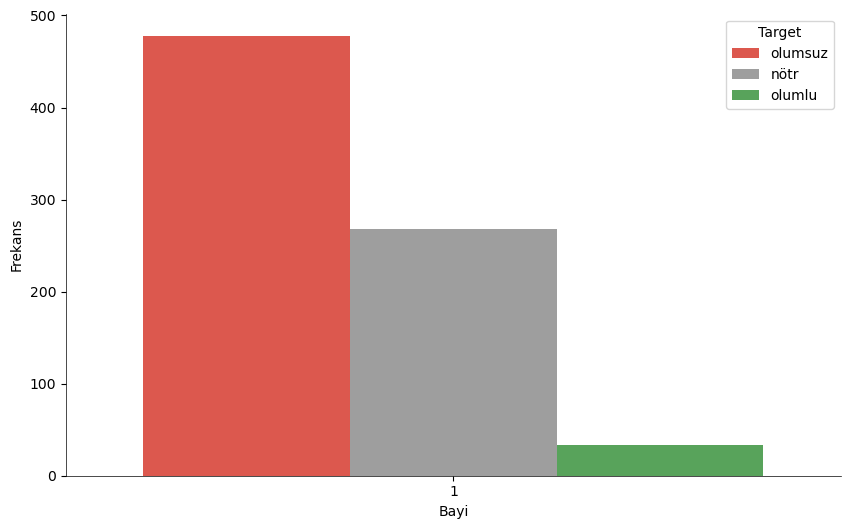

In [169]:
# Define your custom color palette
custom_palette = {
    'olumlu': '#4caf50',  # Green
    'olumsuz': '#f44336',  # Red
    'nötr': '#9e9e9e'    # Grey
}

columns = ['mobil', 'sabit', 'ek paket', 'kampanya', 'diğer', 'reklam', 'çağrı merkezi', 'bayi']

# Visualize each column
for column in columns:
    # Filter the dataframe for column value == 1
    df_filtered = data[data[column] == 1]
    
    # Create the count plot with custom palette
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_filtered, x=column, hue='target', palette=custom_palette)
    
    # Despine and set background color
    sns.despine()
    plt.gca().set_facecolor('#ffffff')  # White background
    plt.gcf().patch.set_facecolor('#ffffff')  # White background for the figure
    
    # Add a subtle box around the plot
    for spine in plt.gca().spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(0.5)  # Thinner line for a more subtle effect

    # Add titles and labels
    plt.xlabel(column.capitalize())
    plt.ylabel('Frekans')
    plt.legend(title='Target')
    plt.savefig(f'{column}_dagilimi.png')
    # Show plot
    plt.show()






## Aksiyonu 1 olup Reasona Kırınımları

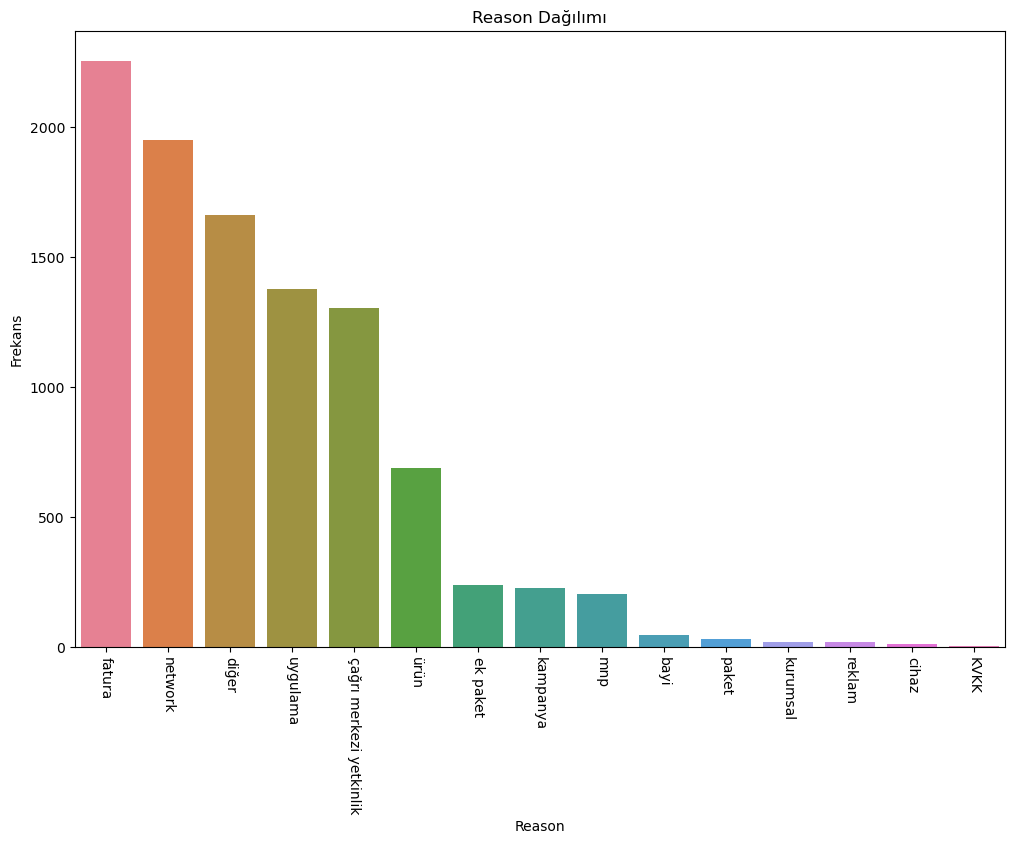

reason: 
                         Frequency
reason                            
fatura                        2257
network                       1950
diğer                         1662
uygulama                      1377
çağrı merkezi yetkinlik       1305
ürün                           688
ek paket                       241
kampanya                       226
mnp                            206
bayi                            47
paket                           33
kurumsal                        20
reklam                          19
cihaz                           13
KVKK                             3


In [205]:
import matplotlib.pyplot as plt
import seaborn as sns

def bar_plot(variable, filter_col=None, filter_val=None):
    """
    Input:
        variable: The column name to plot (e.g., 'reason')
        filter_col: Column to filter (e.g., 'aksiyon')
        filter_val: Value to filter on (e.g., 1)
    Output:
        Displays a bar plot and prints the value count
    """
    # Get feature
    if filter_col and filter_val:
        data1 = data[data[filter_col] == filter_val]
    else:
        data1 = data
    
    # Count number of categorical variable (value/sample)
    varValue = data1[variable].value_counts().reset_index()
    varValue.columns = [variable, 'Frequency']
    
    # Define a color palette with distinct colors for each category
    unique_values = varValue[variable].unique()
    custom_palette = sns.color_palette("husl", len(unique_values))
    
    # Create a mapping of variable values to colors
    color_mapping = dict(zip(unique_values, custom_palette))
    
    # Visualize
    plt.figure(figsize=(12, 8))
    barplot = sns.barplot(x=variable, y='Frequency', data=varValue, palette=color_mapping)
    
    # Rotate x-axis labels vertically
    plt.xticks(rotation=-90)
    
    # Update plot aesthetics
    plt.title(f'{variable.capitalize()} Dağılımı')
    plt.xlabel(variable.capitalize())
    plt.ylabel('Frekans')
    
    # Save the plot as PNG
    plt.savefig('graph8.png', bbox_inches='tight', pad_inches=0.1)
    
    # Show the plot
    plt.show()
    
    # Print the value counts
    print("{}: \n{}".format(variable, varValue.set_index(variable)))

# Example call to the function
bar_plot('reason', filter_col='aksiyon', filter_val=1)




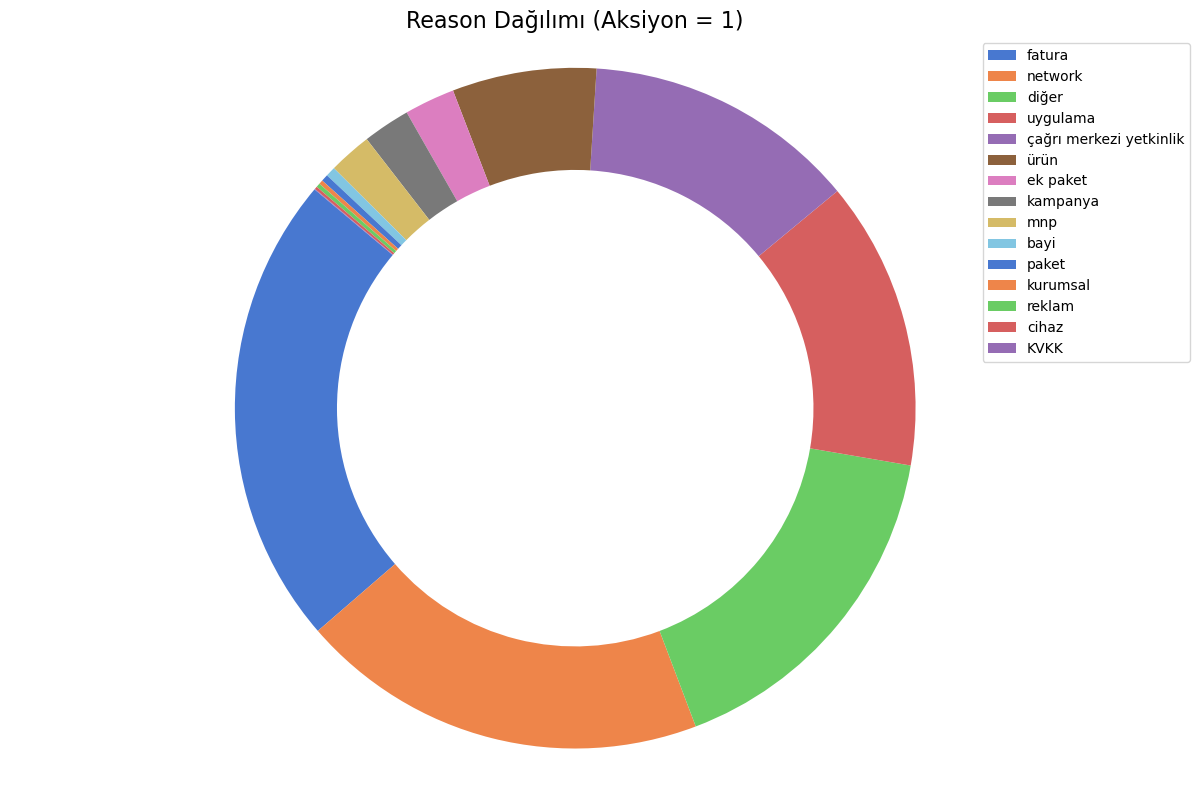

In [207]:
# Filter the dataframe
df_filtered = data[data['aksiyon'] == 1]

# Calculate percentage distribution of the 'reason' column
reason_counts = df_filtered['reason'].value_counts(normalize=True) * 100

# Create a pie chart
plt.figure(figsize=(12, 8))
# Use a muted color palette
colors = sns.color_palette("muted", len(reason_counts))
patches, texts, autotexts = plt.pie(reason_counts, autopct='', startangle=140, colors=colors, wedgeprops=dict(width=0.3))

# Add percentages inside the pie chart
for i, (patch, value) in enumerate(zip(patches, reason_counts)):
    angle = (patch.theta2 - patch.theta1) / 2 + patch.theta1
    x = patch.r * 0.5 * np.cos(np.radians(angle))
    y = patch.r * 0.5 * np.sin(np.radians(angle))


# Adjust legend position
plt.legend(patches, reason_counts.index, loc="upper right", bbox_to_anchor=(1.05, 1))
plt.title('Reason Dağılımı (Aksiyon = 1)', fontsize=16)
plt.axis('equal')  # Equal aspect ratio
plt.tight_layout()  # Adjust layout to fit elements
plt.savefig('graph9.png')
plt.show()

